<a href="https://colab.research.google.com/github/omkarshisode/LGM-Intenship/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing requied Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

## Loading the Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

# Reshaping the traning and testing data.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # Since mnist dataset is gray scale so we write 1 as a color channel.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11501568/11490434 [==============================] - 0s 0us/step


## Normalizing the pixels values of images.

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

## Plotting the Images

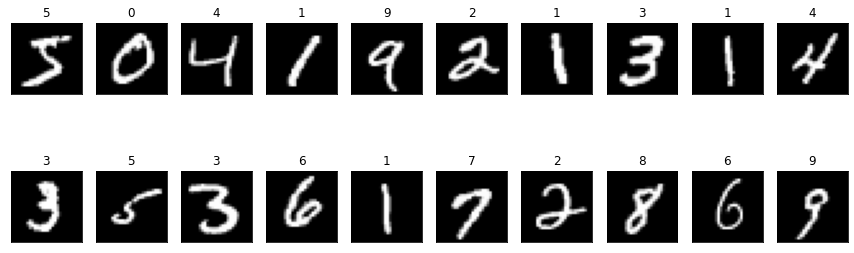

In [6]:
fig = plt.figure(figsize=(15,5))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [7]:
# Determining the shape of the input image.

img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


## Neural Network Mode

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

## Plotting the Model

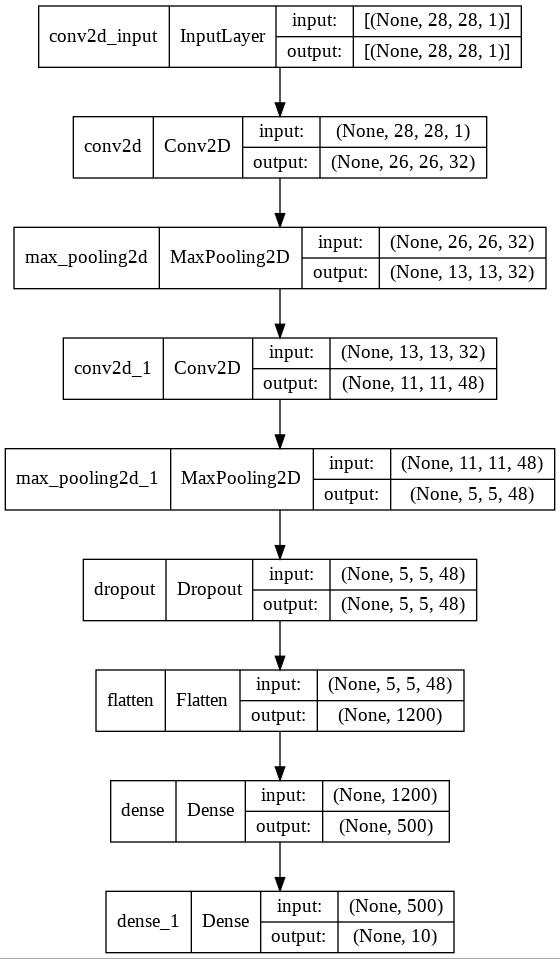

In [10]:
plot_model(model, 'model.jpg', show_shapes=True)

## Compiling the model


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 34s - loss: 0.2496 - accuracy: 0.9228 - val_loss: 0.0568 - val_accuracy: 0.9815 - 34s/epoch - 80ms/step
Epoch 2/10
422/422 - 3s - loss: 0.0820 - accuracy: 0.9753 - val_loss: 0.0404 - val_accuracy: 0.9888 - 3s/epoch - 8ms/step
Epoch 3/10
422/422 - 3s - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0365 - val_accuracy: 0.9897 - 3s/epoch - 8ms/step
Epoch 4/10
422/422 - 3s - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0273 - val_accuracy: 0.9932 - 3s/epoch - 8ms/step
Epoch 5/10
422/422 - 3s - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.0304 - val_accuracy: 0.9912 - 3s/epoch - 8ms/step
Epoch 6/10
422/422 - 3s - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0263 - val_accuracy: 0.9930 - 3s/epoch - 8ms/step
Epoch 7/10
422/422 - 3s - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0257 - val_accuracy: 0.9937 - 3s/epoch - 8ms/step
Epoch 8/10
422/422 - 3s - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0247 - val_accuracy: 0.9932 - 3s/epoch - 8ms/step
Epoch 9/10
422/422 - 

## Testing Accuracy

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.33000206947327


**Checking the number and verifying the predicted number is correct or not.**

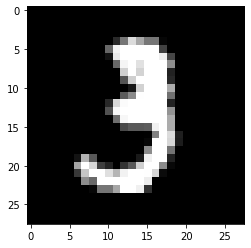

In [13]:
img = x_train[10]

# Now displaying the sample image.

plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

In [14]:
img= img.reshape(1,img.shape[0], img.shape[1], img.shape[2])
pred = model.predict([img])
print("the predicted number is : {}".format(argmax(pred)))

the predicted number is : 3


**So our prediction of number is correct!!**